This file is about the Decision Trees (DT)
- validation
- exploring the max_depth value
- an accurecy score
- confusion matrix and a report

Until the line, above **model**, code are the same for all 4 files for models

In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#from 2.1_0_models_quick.ipynb
%store -r df_models_valid

In [83]:
#make a new datafram by coping <df2_dammy>
df_valid = df_models_valid.copy()
print(df_valid.shape)
df_valid.head(2)

(46090, 652)


,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,Location Description_AIRPORT PARKING LOT,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Year,Month,Day,Hour
3210128,1,1,Persons,12,0,0,0,0,0,0,...,0,0,0,0,0,0,2003,8,15,22
2571066,1,0,Society,15,0,0,0,0,0,0,...,0,0,0,0,0,0,2011,10,6,0


##### validation

In [84]:
#target
y4 = pd.factorize(df_valid['Crimes Against'])[0]
# Convert Categorical Attributes to Numerical
#https://www.kaggle.com/code/heng8835/classification-with-ml-predict-crime-type

#features
X4 = df_valid.drop(columns='Crimes Against')

In [85]:
y4

array([0, 1, 2, ..., 0, 2, 0], dtype=int64)

In [86]:
crimesAgainst = pd.DataFrame({'y4': y4})
crimesAgainst.head()

,y4
0,0
1,1
2,2
3,0
4,0


<Figure size 640x480 with 0 Axes>

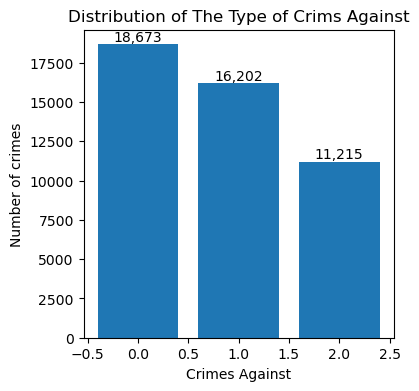

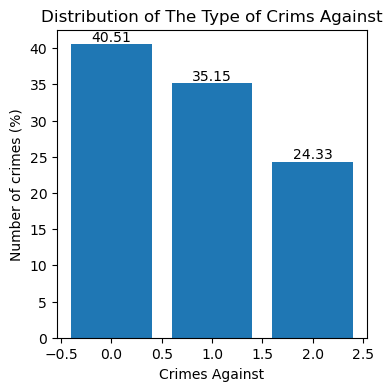

In [87]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

#
crimes_Against = crimesAgainst['y4'].value_counts()
percent = crimes_Against/crimesAgainst.shape[0]*100

#plot with bar
plt.figure()

#numbers
crims = list(crimes_Against.index)
counts = list(crimes_Against.values)

fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(crims, counts)
ax.set(xlabel='Crimes Against', ylabel='Number of crimes', title='Distribution of The Type of Crims Against')
ax.bar_label(bar_container, fmt='{:,.0f}')


#percentages
fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(list(percent.index), list(percent.values))
ax.set(xlabel='Crimes Against', ylabel='Number of crimes (%)', title='Distribution of The Type of Crims Against')
ax.bar_label(bar_container, fmt='{:0.2f}')

plt.show()

x-axis: 0.0, 1.0, 2.0 in the graphes above --> 'Person', 'Society', 'Property'

In [88]:
# Taking a chunk for the 20% test set
X4_remainder, X4_test, y4_remainder, y4_test = train_test_split(
                                        X4, y4, test_size = 0.2, stratify=y4, random_state=1)

- `X_remainder` and `y_remainder`: $80$%
- `X_test` and `y_test`: $20$%

In [89]:
#y4_remainder
y4_remainder

array([1, 2, 2, ..., 2, 1, 2], dtype=int64)

In [90]:
#make a dataframe for 'y4_remainder'
y_df = pd.DataFrame(y4_remainder)
y_df.head()

,0
0,1
1,2
2,2
3,0
4,1


In [91]:
# #
# crimes_Against = y_df.value_counts()
# percent = crimes_Against/crimesAgainst.shape[0]*100

# #plot with bar
# plt.figure()

# #numbers
# crims = list(crimes_Against.index)
# counts = list(crimes_Against.values)

# fig, ax = plt.subplots(figsize = (4,4))
# bar_container = ax.bar(crims, counts)
# ax.set(xlabel='Crimes Against', ylabel='Number of crimes', title='Distribution of The Type of Crims Against')
# ax.bar_label(bar_container, fmt='{:,.0f}')


# #percentages
# fig, ax = plt.subplots(figsize = (4,4))
# bar_container = ax.bar(list(percent.index), list(percent.values))
# ax.set(xlabel='Crimes Against', ylabel='Number of crimes (%)', title='Distribution of The Type of Crims Against')
# ax.bar_label(bar_container, fmt='{:0.2f}')

# plt.show()

### get an error but no time to check. skip this part. assume the destributios are the same

In [92]:
# Splitting the remainder in two chunks
X4_train, X4_valid, y4_train, y4_valid = train_test_split(
                        X4_remainder, y4_remainder, test_size = 0.3, stratify=y4_remainder, random_state=1)

from the remainder set:
- `X_train` and `y_train`: $70$% ( $56$% = $80$ * $70$ )
- `X_valid` and `y_valid`: $30$% ( $24$% = $80$ * $30$ )

In [93]:
#expected size
print(f'Expected sizes: train({46090*0.56}), validation({46090*0.24}), \ttest({46090*0.2})')
#actual size
print(f'Actual sizes: \ttrain({X4_train.shape[0]}), \tvalidation({X4_valid.shape[0]}), \ttest({X4_test.shape[0]})')

Expected sizes: train(25810.4), validation(11061.6), 	test(9218.0)
Actual sizes: 	train(25810), 	validation(11062), 	test(9218)


In [94]:
X4_train.shape

(25810, 651)

---

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
# #scale
# scaler = StandardScaler()
# scaler.fit(X4_train)
# #transform
# X4_train = scaler.transform(X4_train)
# X4_validation = scaler.transform(X4_valid)

In [97]:
depths = list(range(1, int(np.sqrt(len(X4_train)))))
train_scores = []
validation_scores = []

for d in depths:    
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X4_train, y4_train)
    
    # Evaluate
    train_scores.append(dt.score(X4_train, y4_train))
    validation_scores.append(dt.score(X4_valid, y4_valid))

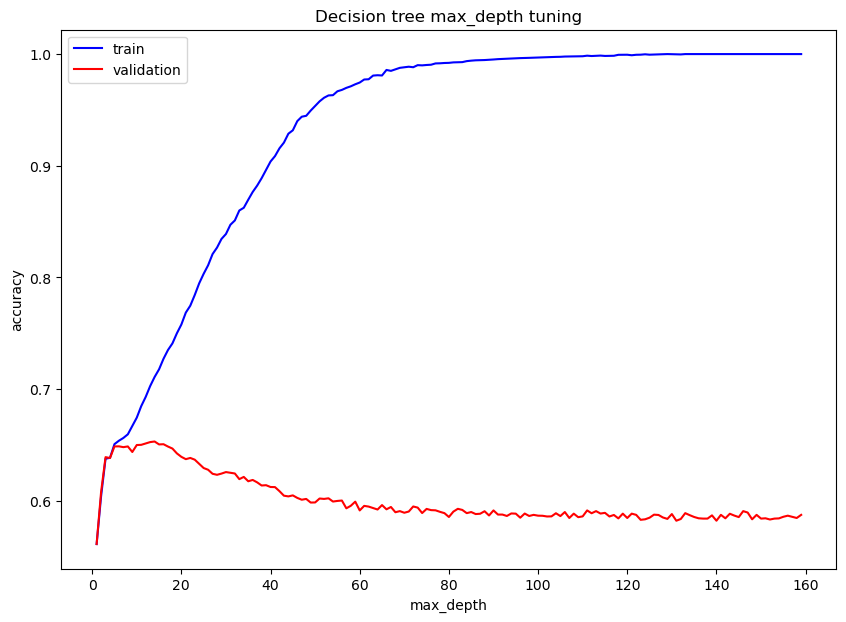

In [98]:
plt.figure(figsize=(10, 7))
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Decision tree max_depth tuning")
plt.legend()
plt.show()

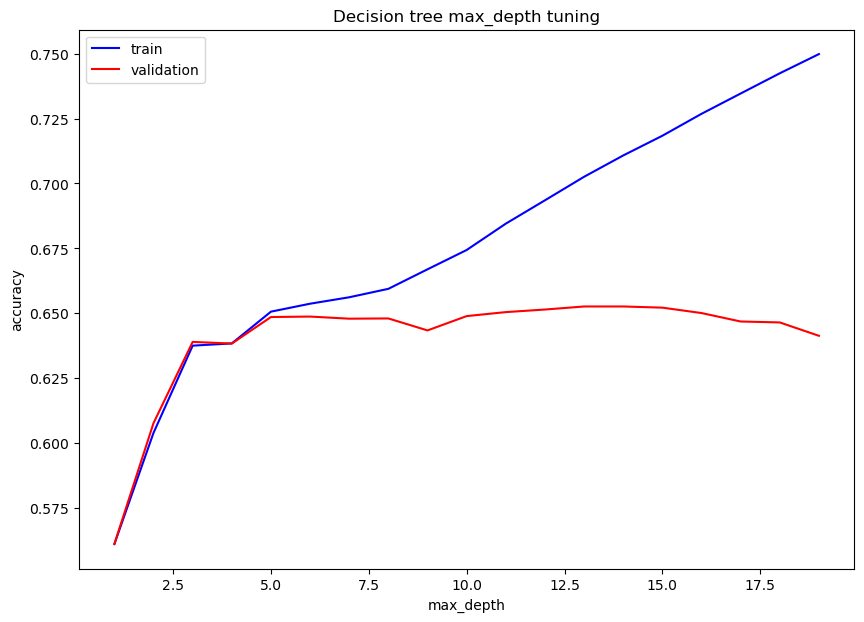

In [99]:
#do it again with a narrower range

depths = list(range(1, 20))
train_scores = []
validation_scores = []

for d in depths:    
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X4_train, y4_train)
    
    # Evaluate
    train_scores.append(dt.score(X4_train, y4_train))
    validation_scores.append(dt.score(X4_valid, y4_valid))

plt.figure(figsize=(10, 7))
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Decision tree max_depth tuning")

plt.legend()
plt.show()

In [100]:
final_model = DecisionTreeClassifier(max_depth = 5)

final_model.fit(X4_train,y4_train)
print(f'{final_model.score(X4_test, y4_test):0.3f}')

0.651


,Predicted Person (0),Predicted Society (1),Predicted Property (2)
Person,1979,447,1309
Society,415,2111,714
Property,185,147,1911


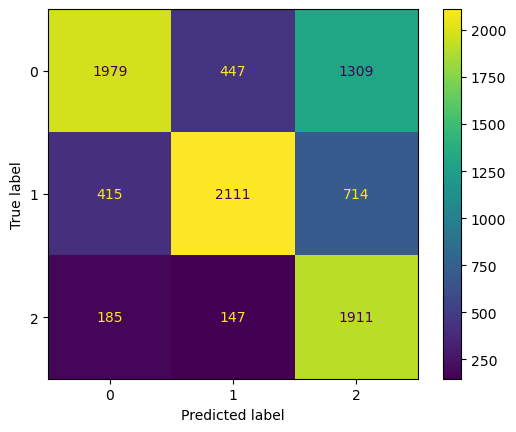

In [101]:
# Get class predictions
y_pred = final_model.predict(X4_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y4_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,columns=['Predicted Person (0)', 'Predicted Society (1)', 'Predicted Property (2)'],
        index=['Person', 'Society', 'Property']
)

display(cf_df)

# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(final_model, X4_test, y4_test)

Correct Predicttions:
- 1979 for Crimes Agains Person (0)
- 2111 for Crimes Against Society (1)
- 1911 for Crimes Against Property (2)

Wrong Predictions
- 415 predicted as 0 instead of 1
- 185 predicted as 0 instead of 2
- 447 predicted as 1 instead of 0
- 147 predicted as 1 instead of 2
- 1309 predicted as 2 instead of 0
- 714 predicted as 2 instead of 1

In [102]:
from sklearn.metrics import classification_report

report_initial = classification_report(y4_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.77      0.53      0.63      3735
           1       0.78      0.65      0.71      3240
           2       0.49      0.85      0.62      2243

    accuracy                           0.65      9218
   macro avg       0.68      0.68      0.65      9218
weighted avg       0.70      0.65      0.65      9218



Precision: how many of them are correctly predicted in the predicted group.
recall: how many of them are correctly predictted in the group

Crimes Agains Person (0):
- 77% is 0 and 23% is 1 or 2 in the predicted group 0 
- 63% is 0 in the predicted group 0 and 37% is 0 in the defferent group: 1 or 2

Crimes Against Society (1):
- 78% is 1 and 22% is 0 or 2 in the predicted group 1 
- 65% is 1 in the predicted group 1 and 35% is 1 in the defferent group: 0 or 2

Crimes Against Property (2):
- 49% is 2 and 51% is 0 or 1 in the predicted group 2
- 85% is 2 in the predicted group 2 and 15% is 2 in the defferent group: 0 or 1